In [89]:
import numpy as np
import matplotlib.pyplot as plt
from cpymad.madx import Madx
from pybt.tools.plotters import *
from madxtools.plot_tool import *
import requests
from madxtools.air_scattering import *

In [90]:
E_cin_per_nucleon = 2.0
# Ion properties
A = 208.0
Z = 82.0
N = 126.0
charge = 54.0
m_proton_GeV = 0.93828
m_neutron_GeV = 0.93957
m_electron_GeV = 0.000511
m_u_GeV = 0.9315
mass_defect_GeV = Z * m_proton_GeV + N * m_neutron_GeV + (Z - charge) * m_electron_GeV - A * m_u_GeV
E_0 = Z * m_proton_GeV + N * m_neutron_GeV - mass_defect_GeV

p = E_0 * np.sqrt((((E_cin_per_nucleon * A) / E_0) + 1) ** 2 - 1)

gamma = p/charge/0.938
beta = np.sqrt(1-gamma**(-2))
exn=1.5e-6
eyn=1.5e-6
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

print(p/charge)
print(f"gamma = {round(gamma,3)}")
print(f"beta = {round(beta,3)}")
print(f"p = {round(p/charge,3)} GeV/c")

Brho = 3.33564*p/charge

10.706294697042374
gamma = 11.414
beta = 0.996
p = 10.706 GeV/c


/Users/eliottjohnson/git_repos/quad-scan-east/venv/lib/python3.10/site-packages/madxtools/plot_tool.py:163: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].set_xlim(0,twiss.s[-1])
/Users/eliottjohnson/git_repos/quad-scan-east/venv/lib/python3.10/site-packages/madxtools/plot_tool.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[2].set_xlim(0,twiss.s[-1])
/Users/eliottjohnson/git_repos/quad-scan-east/venv/lib/python3.10/site-packages/madxtools/plot_tool.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

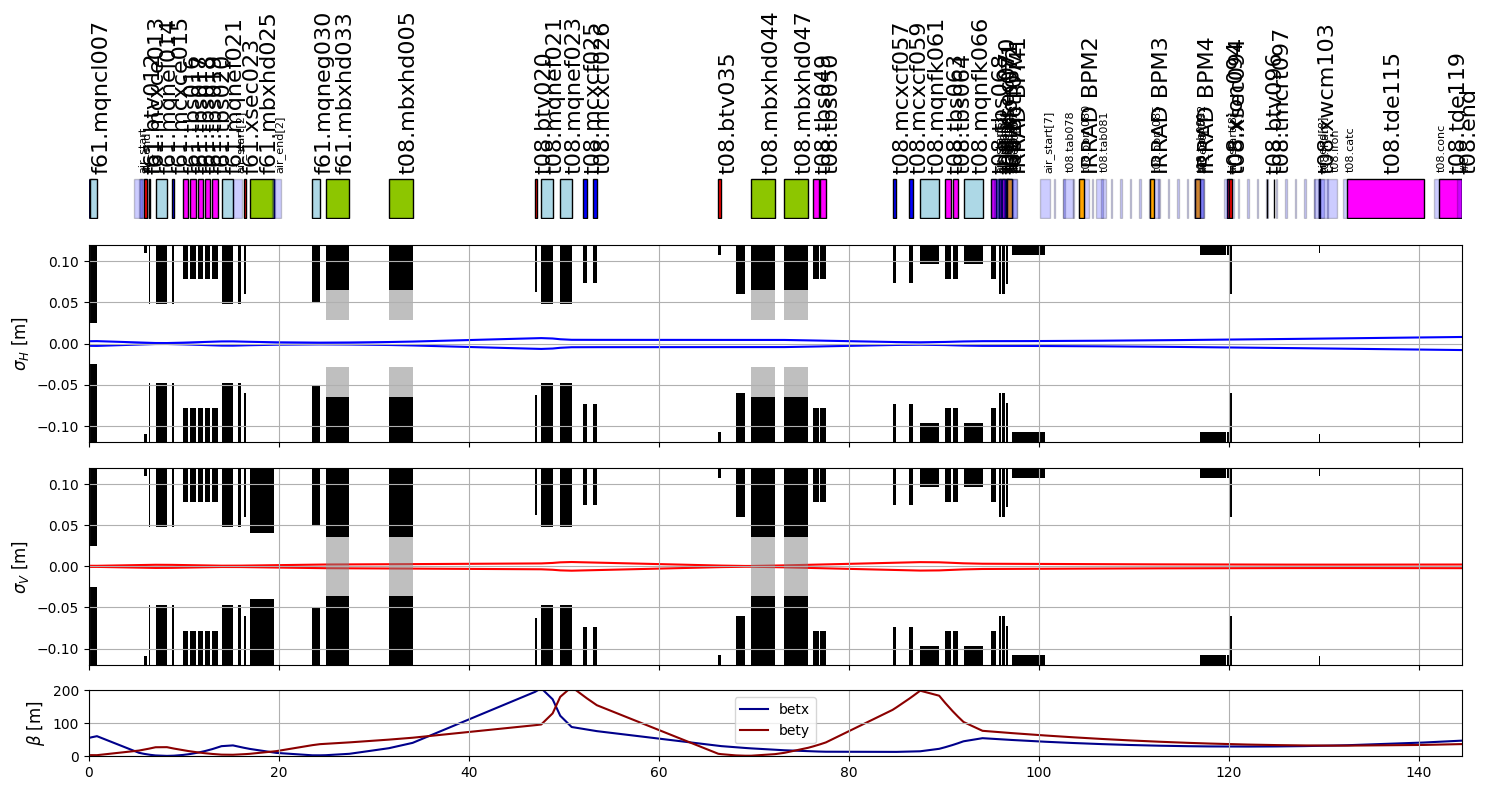

In [91]:
# Matched initial parameters 13nd oct 2023
betx0 = 53.074
alfx0 = -13.191
dx0 = 0.13
dpx0 = 0.02
exn0 = 2.53e-5

bety0 = 3.675
alfy0 = 0.859
dy0 = 0.0
dpy0 = 0.0
eyn0 = 6.94e-06

sige = 0.0045

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

madx.command.beam(particle='PROTON',pc=str(p/charge),ex=ex,ey=ey)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')  



# Add the Air region
sequence = "f61t8_op"

p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

#t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


# add_hidden_marker(madx, sequence, 20, 100, steps)

madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
madx.use(sequence=sequence)

# make thin
madx.use(sequence="f61t8_op")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')
madx.use(sequence="f61t8_op")
madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
# madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")

madx.use(sequence)
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])

# Air scattering
madx.use(sequence=sequence)
madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p/charge, twiss, ex_initial, ey_initial)

# Finding optics

In [34]:
# Smallest beam size
import scipy.optimize as optimize

instrument_focal_point = "t08.xwcm103"

def f_focal_at_location(params):
    k_QFN1, k_QDN2, k_QFN3, k_QDN4, k_QFN5, k_QDN6, k_QDN7, k_QFN8 = params

    with open('tempfile', 'w') as f:
        madx = Madx(stdout=f,stderr=f)
        madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

    madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
    madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

    madx.command.beam(particle='PROTON',pc=str(p/charge),ex=ex,ey=ey)
    madx.input('BRHO      := BEAM->PC * 3.3356;')
    madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')  



    # Add the Air region
    sequence = "f61t8_op"

    p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
    p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
    add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
    p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
    add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

    #t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
    p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
    add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
    add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
    add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
    add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

    pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
    len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
    pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
    add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

    pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
    len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
    pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
    add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


    # add_hidden_marker(madx, sequence, 20, 100, steps)

    madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
    madx.input('BRHO      := BEAM->PC * 3.3356;')
    madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
    madx.use(sequence=sequence)

    # make thin
    madx.use(sequence="f61t8_op")
    madx.input('SEQEDIT, sequence=f61t8_op;')
    madx.input('FLATTEN;')
    madx.input('ENDEDIT;')
    madx.use(sequence="f61t8_op")
    madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
    # madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")

    madx.use(sequence)
    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()


    print(params)
    madx.input("kQFN1 = "+str(k_QFN1)+";")
    madx.input("kQDN2 = "+str(-k_QDN2)+";")
    madx.input("kQFN3 = "+str(k_QFN3)+";")
    madx.input("kQDN4 = "+str(-k_QDN4)+";")
    madx.input("kQFN5 = "+str(k_QFN5)+";")
    madx.input("kQDN6 = "+str(-k_QDN6)+";")
    madx.input("kQDN7 = "+str(-k_QDN7)+";")
    madx.input("kQFN8 = "+str(k_QFN8)+";")

    # Air scattering
    madx.use(sequence=sequence)
    madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
    twiss_f61, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p/charge, twiss, ex_initial, ey_initial)

   
    penality = 0
    if ( any(val < 0 for val in twiss_scattered.loc[twiss_scattered.aper_1 != 0].aper_1 - beam_size(twiss_scattered.loc[twiss_scattered.aper_1 != 0]['betx'], twiss_scattered.loc[twiss_scattered.aper_1 != 0]['dx'], twiss_scattered.loc[twiss_scattered.aper_1 != 0].ex, sige, 2)) == True): # Only do the check were you have aperture data
        print ("Touching aperture H")
        penality = 1e0
    if ( any(val < 0 for val in twiss_scattered.loc[twiss_scattered.aper_2 != 0].aper_2 - beam_size(twiss_scattered.loc[twiss_scattered.aper_2 != 0]['bety'], twiss_scattered.loc[twiss_scattered.aper_2 != 0]['dy'], twiss_scattered.loc[twiss_scattered.aper_2 != 0].ey, sige, 2)) == True):
        print ("Touching aperture V")
        penality = 1e0
        

    x_beam_size = beam_size(twiss_scattered['betx'][instrument_focal_point], twiss_scattered['dx'][instrument_focal_point], twiss_scattered['ex'][instrument_focal_point], sige, 1)
    y_beam_size = beam_size(twiss_scattered['bety'][instrument_focal_point], twiss_scattered['dy'][instrument_focal_point], twiss_scattered['ey'][instrument_focal_point], sige, 1)
    objective = x_beam_size**2*1000 + y_beam_size**2*1000 + penality
    print (objective)
    return objective


initial_guess = [0.478651, 0.17, 0.197, 0.090441, 0.194148, 0.194148, 0.0611, 0.0687]
result = optimize.minimize(f_focal_at_location, initial_guess, bounds = [(0,0.53823),(0,0.221974),(0,0.215518),(0,0.103435),(0,0.219329),(0,0.219329),(0,0.104392),(0,0.109391)], method="Nelder-Mead") # options={"maxiter": 10}
if result.success:
    fitted_params_focal_mwpc = result.x
    print(fitted_params_focal_mwpc)
else:
    raise ValueError(result.message)

[0.478651 0.17     0.197    0.090441 0.194148 0.194148 0.0611   0.0687  ]
0.3202095350517753
[0.50258355 0.17       0.197      0.090441   0.194148   0.194148
 0.0611     0.0687    ]
0.3159010249703799
[0.478651 0.1785   0.197    0.090441 0.194148 0.194148 0.0611   0.0687  ]
0.3185160108004925
[0.478651 0.17     0.20685  0.090441 0.194148 0.194148 0.0611   0.0687  ]
0.3257440168181433
[0.478651   0.17       0.197      0.09496305 0.194148   0.194148
 0.0611     0.0687    ]
0.3033018793252304
[0.478651  0.17      0.197     0.090441  0.2038554 0.194148  0.0611
 0.0687   ]
0.3478129931052731
[0.478651  0.17      0.197     0.090441  0.194148  0.2038554 0.0611
 0.0687   ]
0.34532881000145405
[0.478651 0.17     0.197    0.090441 0.194148 0.194148 0.064155 0.0687  ]
0.2571659733694289
[0.478651 0.17     0.197    0.090441 0.194148 0.194148 0.0611   0.072135]
0.37465704384055953
[0.48463414 0.172125   0.1994625  0.09157151 0.19657485 0.19657485
 0.06186375 0.065265  ]
0.2648632670992276
[0.486129

In [101]:
# Largest beam size
import scipy.optimize as optimize

instrument_focal_point = "t08.xwcm103"

def f_focal_at_location(params):
    k_QFN1, k_QDN2, k_QFN3, k_QDN4, k_QFN5, k_QDN6, k_QDN7, k_QFN8 = params

    with open('tempfile', 'w') as f:
        madx = Madx(stdout=f,stderr=f)
        madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

    madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
    madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

    madx.command.beam(particle='PROTON',pc=str(p/charge),ex=ex,ey=ey)
    madx.input('BRHO      := BEAM->PC * 3.3356;')
    madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')  



    # # Add the Air region
    # sequence = "f61t8_op"

    # p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
    # p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
    # add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

    # p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
    # p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
    # add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

    # #t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
    # p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
    # p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
    # add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

    # p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
    # p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
    # add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

    # p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
    # p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
    # add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

    # p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
    # p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
    # add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

    # pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
    # len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
    # pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
    # add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

    # pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
    # len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
    # pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
    # add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


    # # add_hidden_marker(madx, sequence, 20, 100, steps)

    # madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
    # madx.input('BRHO      := BEAM->PC * 3.3356;')
    # madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
    # madx.use(sequence=sequence)

    # # make thin
    # madx.use(sequence="f61t8_op")
    # madx.input('SEQEDIT, sequence=f61t8_op;')
    # madx.input('FLATTEN;')
    # madx.input('ENDEDIT;')
    # madx.use(sequence="f61t8_op")
    # madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
    # # madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")

    # madx.use(sequence)
    # twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()


    print(params)
    madx.input("kQFN1 = "+str(k_QFN1)+";")
    madx.input("kQDN2 = "+str(-k_QDN2)+";")
    madx.input("kQFN3 = "+str(k_QFN3)+";")
    madx.input("kQDN4 = "+str(-k_QDN4)+";")
    madx.input("kQFN5 = "+str(k_QFN5)+";")
    madx.input("kQDN6 = "+str(-k_QDN6)+";")
    madx.input("kQDN7 = "+str(-k_QDN7)+";")
    madx.input("kQFN8 = "+str(k_QFN8)+";")

    # # Air scattering
    # madx.use(sequence=sequence)
    # madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
    # twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
    # twiss_f61, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p/charge, twiss, ex_initial, ey_initial)

    madx.use(sequence)
    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

    target_beam_size = 200 # mm

    penality = 0
    if ( any(val < 0 for val in twiss.loc[twiss.aper_1 != 0].aper_1 - beam_size(twiss.loc[twiss.aper_1 != 0]['betx'], twiss.loc[twiss.aper_1 != 0]['dx'], ex, sige, 2)) == True): # Only do the check were you have aperture data
        print ("Touching aperture H")
        penality = 1e0
    if ( any(val < 0 for val in twiss.loc[twiss.aper_2 != 0].aper_2 - beam_size(twiss.loc[twiss.aper_2 != 0]['bety'], twiss.loc[twiss.aper_2 != 0]['dy'], ey, sige, 2)) == True):
        print ("Touching aperture V")
        penality = 1e0
    if ( any(val < 0 for val in twiss.loc[twiss.aper_1 != 0].aper_1 - beam_size(twiss.loc[twiss.aper_1 != 0]['bety'], twiss.loc[twiss.aper_1 != 0]['dy'], ey, sige, 2)) == True):
        print ("Touching aperture V")
        penality = 1e0
        
    x_beam_size = abs(target_beam_size/1000 - beam_size(twiss['betx'][instrument_focal_point], twiss['dx'][instrument_focal_point], ex, sige, 1))
    y_beam_size = abs(target_beam_size/1000 - beam_size(twiss['bety'][instrument_focal_point], twiss['dy'][instrument_focal_point], ex, sige, 1))
    objective = x_beam_size**2 + y_beam_size**2 + penality
    print (objective)
    return objective

initial_guess = [0.478651, 0.17, 0.197, 0.090441, 0.194148, 0.194148, 0.0611, 0.0687]
result = optimize.minimize(f_focal_at_location, initial_guess, bounds = [(0,0.53823),(0,0.221974),(0,0.215518),(0,0.103435),(0,0.219329),(0,0.219329),(0,0.104392),(0,0.109391)], method="Nelder-Mead") # , options={"maxiter": 100}
if result.success:
    fitted_params_big_beam_mwpc = result.x
    print(fitted_params_big_beam_mwpc)
else:
    raise ValueError(result.message)

[0.478651 0.17     0.197    0.090441 0.194148 0.194148 0.0611   0.0687  ]
0.19491742790687724
0.19172575239112932
0.07475156783177732
[0.50258355 0.17       0.197      0.090441   0.194148   0.194148
 0.0611     0.0687    ]
0.1950586405491083
0.19195612343585167
0.07489502657738614
[0.478651 0.1785   0.197    0.090441 0.194148 0.194148 0.0611   0.0687  ]
0.19491503576882394
0.19142462271340258
0.07463525734973044
[0.478651 0.17     0.20685  0.090441 0.194148 0.194148 0.0611   0.0687  ]
0.19526119515456167
0.19139319475475533
0.07475828933161952
[0.478651   0.17       0.197      0.09496305 0.194148   0.194148
 0.0611     0.0687    ]
0.19492159263716258
0.19226278895698914
0.07495940729372769
[0.478651  0.17      0.197     0.090441  0.2038554 0.194148  0.0611
 0.0687   ]
0.19485102252700076
0.19184562977638592
0.07477166664411589
[0.478651  0.17      0.197     0.090441  0.194148  0.2038554 0.0611
 0.0687   ]
0.19445092941601036
0.19124015574712458
0.0743839611209347
[0.478651 0.17     0.1

In [102]:
fitted_params_big_beam_mwpc = result.x

# Check the solution

/Users/eliottjohnson/git_repos/quad-scan-east/venv/lib/python3.10/site-packages/madxtools/plot_tool.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,twiss.s[-1])
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_17086/652423153.py:116: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].set_xlim(0,twiss_scattered.s[-1])
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_17086/652423153.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a

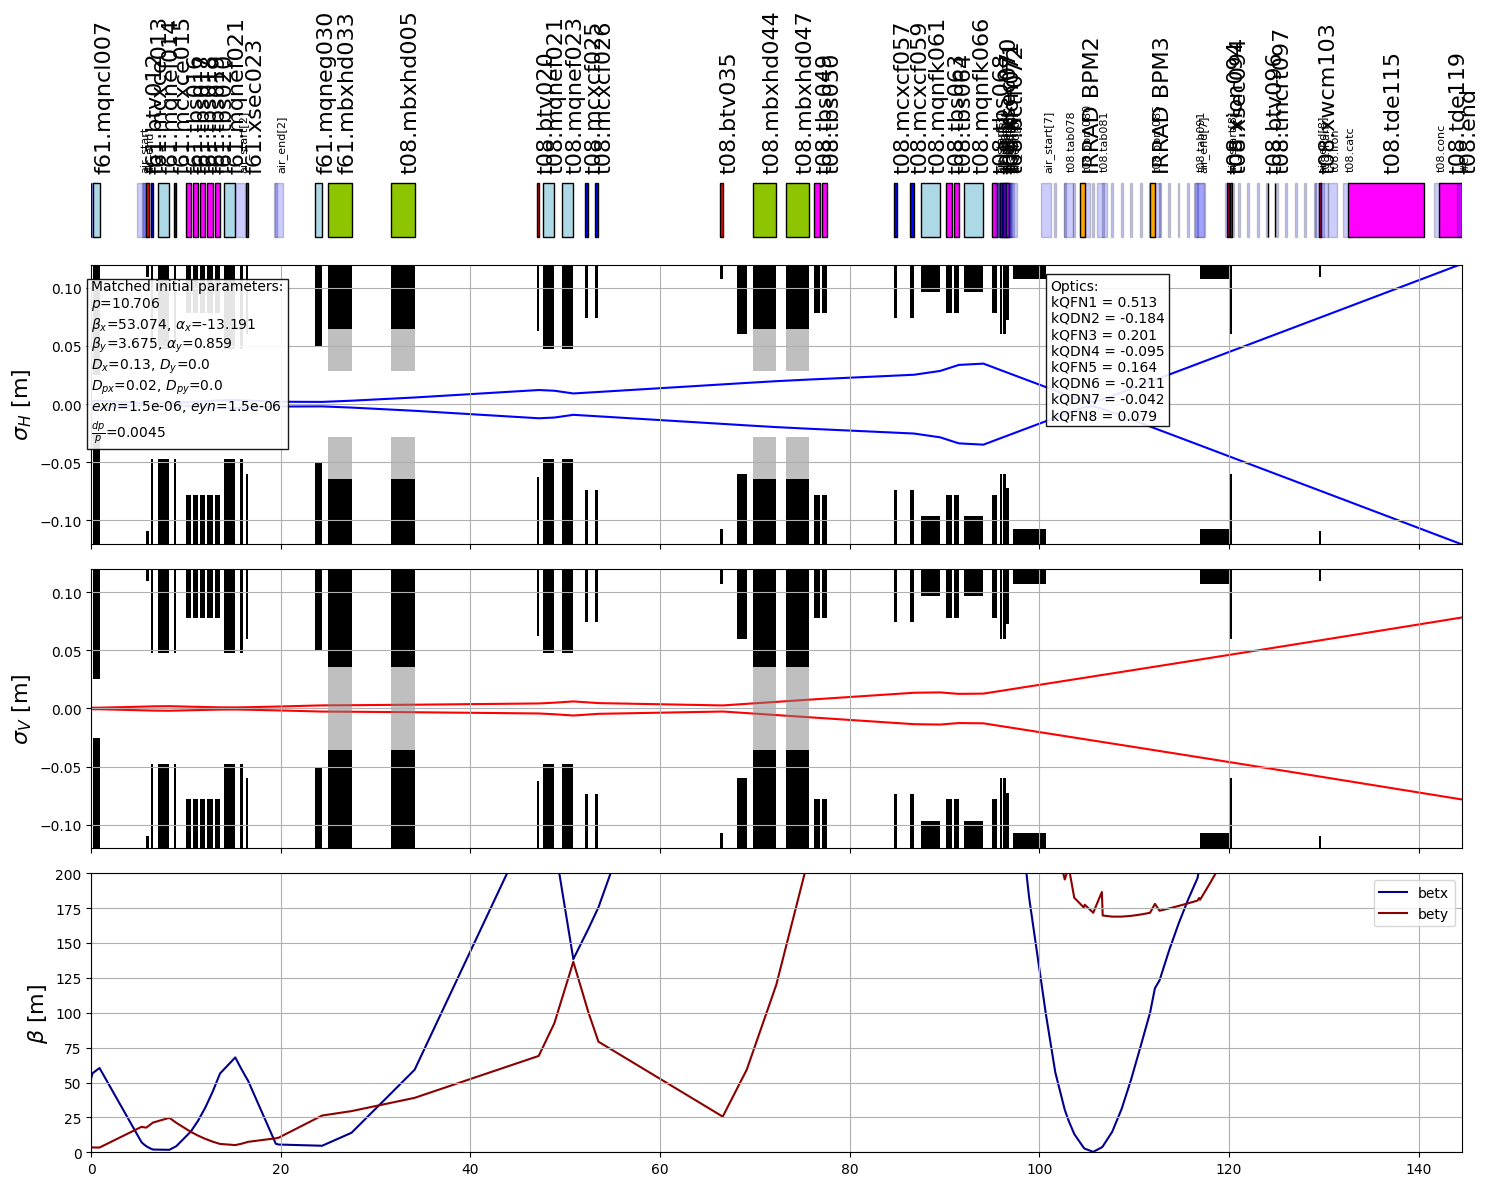

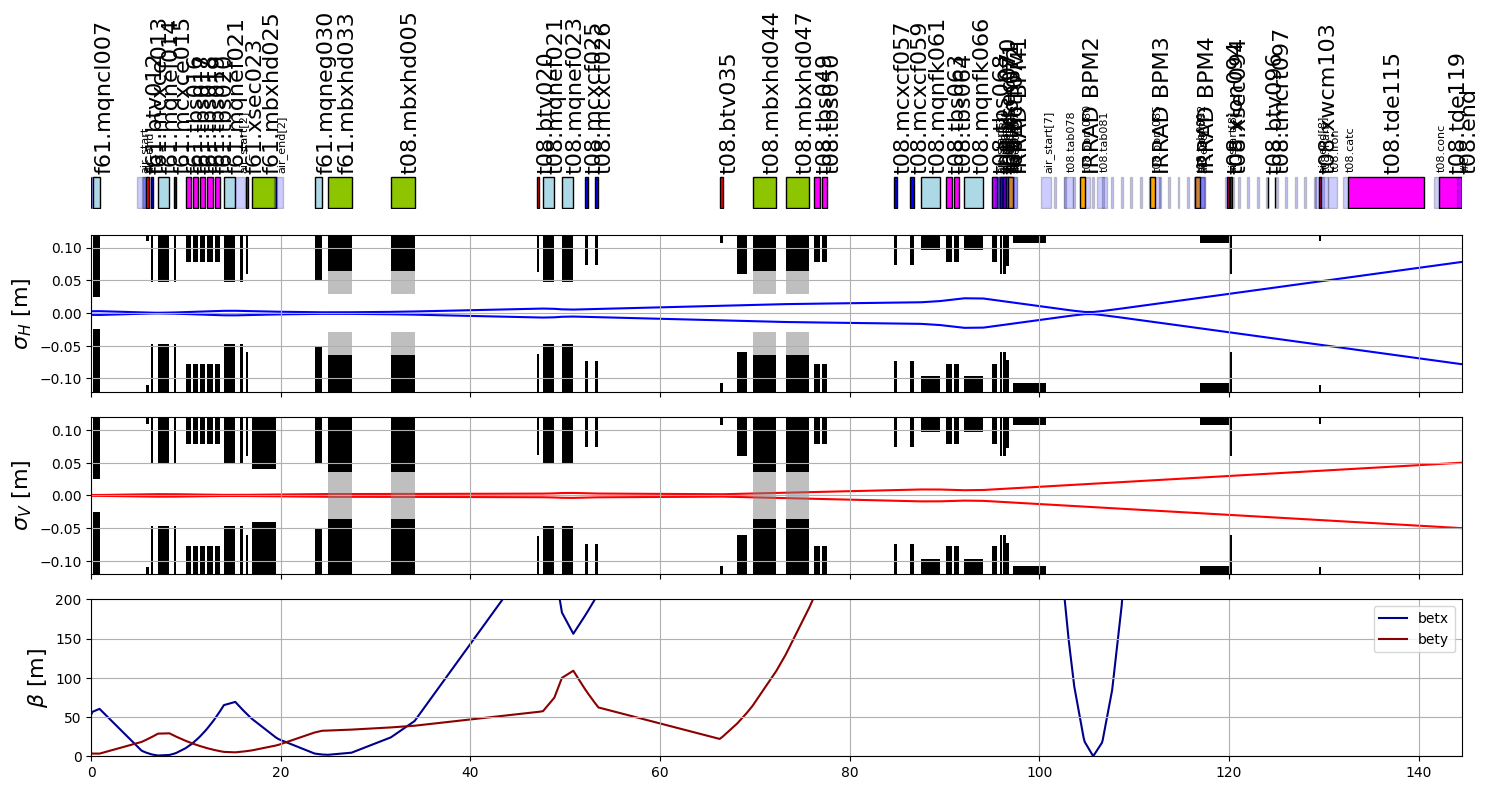

In [106]:
# Matched initial parameters 13nd oct 2023
betx0 = 53.074
alfx0 = -13.191
dx0 = 0.13
dpx0 = 0.02
exn0 = 2.53e-5

bety0 = 3.675
alfy0 = 0.859
dy0 = 0.0
dpy0 = 0.0
eyn0 = 6.94e-06

sige = 0.0045

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

# Optics
optics = fitted_params_big_beam_mwpc
madx.input("kQFN1 = "+str(optics[0])+";")
madx.input("kQDN2 = "+str(-optics[1])+";")
madx.input("kQFN3 = "+str(optics[2])+";")
madx.input("kQDN4 = "+str(-optics[3])+";")
madx.input("kQFN5 = "+str(optics[4])+";")
madx.input("kQDN6 = "+str(-optics[5])+";")
madx.input("kQDN7 = "+str(-optics[6])+";")
madx.input("kQFN8 = "+str(optics[7])+";")

# Add the Air region
sequence = "f61t8_op"

p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

#t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


# add_hidden_marker(madx, sequence, 20, 100, steps)

madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
madx.use(sequence=sequence)

# make thin
madx.use(sequence="f61t8_op")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')
madx.use(sequence="f61t8_op")
madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
# madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")
madx.use(sequence="f61t8_op")


twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

# plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])


# Air scattering
madx.use(sequence=sequence)
madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p/charge, twiss, ex_initial, ey_initial)

fontsize=16
figsize=(15,12)
height_ratios=[1,3,3,3]
fig, ax = plt.subplots(4,1, figsize=figsize, tight_layout=True, sharex=True, height_ratios=height_ratios)
    
draw_synoptic(ax[0], twiss_scattered)

ax[1].plot(twiss_scattered['s'], beam_size(twiss_scattered['betx'], twiss_scattered['dx'], twiss_scattered['ex'], sige, 1)+twiss_scattered.x, alpha=1.0, color ="b", zorder=0)
ax[1].plot(twiss_scattered['s'], -beam_size(twiss_scattered['betx'], twiss_scattered['dx'], twiss_scattered['ex'], sige, 1)+twiss_scattered.x, alpha=1.0, color ="b", zorder=0)
ax[1].set_xlim(0,twiss_scattered.s[-1])

ax[2].plot(twiss_scattered['s'], beam_size(twiss_scattered['bety'], twiss_scattered['dy'], twiss_scattered['ey'], sige, 1)+twiss_scattered.y, alpha=1.0, color ="r", zorder=0)
ax[2].plot(twiss_scattered['s'], -beam_size(twiss_scattered['bety'], twiss_scattered['dy'], twiss_scattered['ey'], sige, 1)+twiss_scattered.y, alpha=1.0, color ="r", zorder=0)
ax[2].set_xlim(0,twiss_scattered.s[-1])

ax[1].grid()
ax[1].set_ylim(-0.12, 0.12)
ax[1].set_ylabel(r"$\sigma_{H}$ [m]", fontsize=fontsize)

ax[2].grid()
ax[2].set_ylim(-0.12, 0.12)
ax[2].set_ylabel(r"$\sigma_{V}$ [m]", fontsize=fontsize)

ax[3].plot(twiss_scattered.s, twiss_scattered.betx, alpha=1.0, color ="darkblue", zorder=0, label="betx")
ax[3].plot(twiss_scattered.s, twiss_scattered.bety, alpha=1.0, color ="darkred", zorder=0, label="bety")
ax[3].set_xlim(0,twiss_scattered.s[-1])

ax[3].legend()
ax[3].set_ylim(0, 200)
ax[3].grid()
ax[3].set_ylabel(r"$\beta$ [m]", fontsize=fontsize)

draw_aperture_circle(ax[1], twiss_scattered, "aper_1")
draw_aperture_circle(ax[2], twiss_scattered, "aper_1")
draw_aperture_rectangle(ax[1], twiss_scattered, "aper_1")
draw_aperture_rectangle(ax[2], twiss_scattered, "aper_2")
draw_aperture_racetrackH(ax[1], twiss_scattered, "aper_1", "aper_2", "aper_3", "aper_4")
draw_aperture_racetrackV(ax[2], twiss_scattered, "aper_1", "aper_2", "aper_3", "aper_4")


# Box with initial parameters
textstr = '\n'.join((
    "Matched initial parameters:",
    r'$p$='+str(round(p/charge,3)),
    r'$\beta_{x}$='+str(round(betx0,3))+r', $\alpha_{x}$='+str(round(alfx0,3)),
    r'$\beta_{y}$='+str(round(bety0,3))+r', $\alpha_{y}$='+str(round(alfy0,3)),
    r'$D_{x}$='+str(round(dx0,3))+r', $D_{y}$='+str(round(dy0,3)),
    r'$D_{px}$='+str(round(dpx0,3))+r', $D_{py}$='+str(round(dpy0,3)),
    r'$exn$='+str(round(exn,8))+r', $eyn$='+str(round(eyn,8)),
    r'$\frac{dp}{p}$='+str(round(sige,6)),
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
ax[1].text(0., 0.95, textstr, transform=ax[1].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


# Box with optics
textstr = '\n'.join((
    "Optics:",
    "kQFN1 = "+str(round(optics[0],3)),
    "kQDN2 = "+str(round(-optics[1],3)),
    "kQFN3 = "+str(round(optics[2],3)),
    "kQDN4 = "+str(round(-optics[3],3)),
    "kQFN5 = "+str(round(optics[4],3)),
    "kQDN6 = "+str(round(-optics[5],3)),
    "kQDN7 = "+str(round(-optics[6],3)),
    "kQFN8 = "+str(round(optics[7],3)),
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
ax[1].text(0.7, 0.95, textstr, transform=ax[1].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plot_graph(twiss, ex, sige, ey, figsize=(15,8))

In [ ]:
x_beam_size = beam_size(twiss_scattered['betx'][instrument_focal_point], twiss_scattered['dx'][instrument_focal_point], twiss_scattered['ex'][instrument_focal_point], sige, 1)
y_beam_size = beam_size(twiss_scattered['bety'][instrument_focal_point], twiss_scattered['dy'][instrument_focal_point], twiss_scattered['ey'][instrument_focal_point], sige, 1)

print(f"{round(x_beam_size*1000, 4)} mm")
print(f"{round(y_beam_size*1000, 4)} mm")

7.5314 mm
7.0405 mm


# Quadrupole scan

In [107]:
op_optics = [
    0.47969,
    0.21,
    0.19864,
    0.09034,
    0.19593,
    0.194471,
    0.0613708,
    0.068965,
]

/Users/eliottjohnson/git_repos/quad-scan-east/venv/lib/python3.10/site-packages/madxtools/plot_tool.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,twiss.s[-1])
/Users/eliottjohnson/git_repos/quad-scan-east/venv/lib/python3.10/site-packages/madxtools/plot_tool.py:163: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].set_xlim(0,twiss.s[-1])
/Users/eliottjohnson/git_repos/quad-scan-east/venv/lib/python3.10/site-packages/madxtools/plot_tool.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

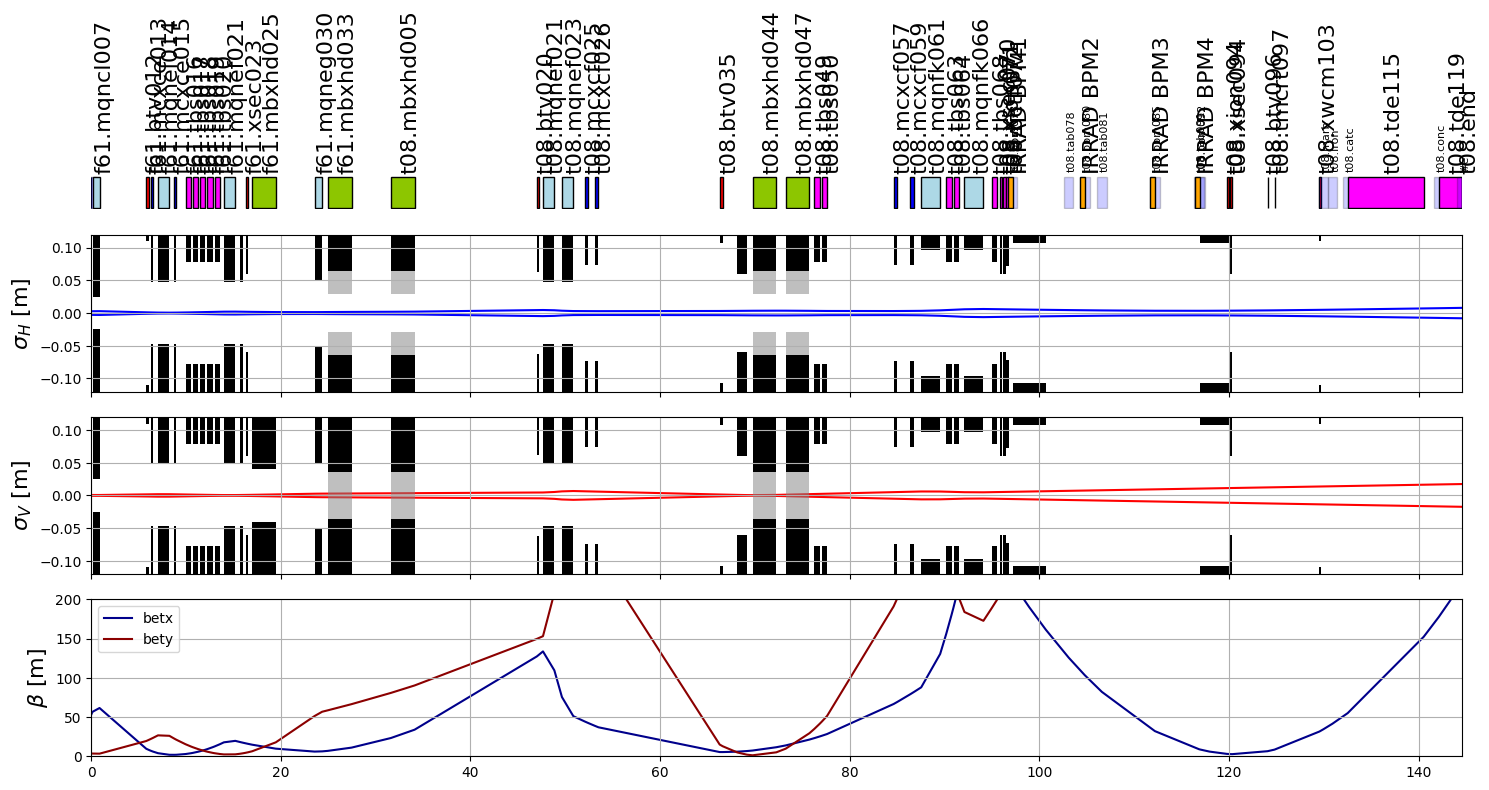

In [109]:
# Largest beam size
import scipy.optimize as optimize

instrument_focal_point = "t08.xwcm103"


with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

madx.command.beam(particle='PROTON',pc=str(p/charge),ex=ex,ey=ey)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')  

optics = op_optics
madx.input("kQFN1 = "+str(optics[0])+";")
madx.input("kQDN2 = "+str(-optics[1])+";")
madx.input("kQFN3 = "+str(optics[2])+";")
madx.input("kQDN4 = "+str(-optics[3])+";")
madx.input("kQFN5 = "+str(optics[4])+";")
madx.input("kQDN6 = "+str(-optics[5])+";")
madx.input("kQDN7 = "+str(-optics[6])+";")
madx.input("kQFN8 = "+str(optics[7])+";")

madx.use(sequence)
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

plot_graph(twiss, ex, sige, ey, figsize=(15,8))


/Users/eliottjohnson/git_repos/quad-scan-east/venv/lib/python3.10/site-packages/madxtools/plot_tool.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,twiss.s[-1])
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_17086/3797350918.py:116: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].set_xlim(0,twiss_scattered.s[-1])
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_17086/3797350918.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

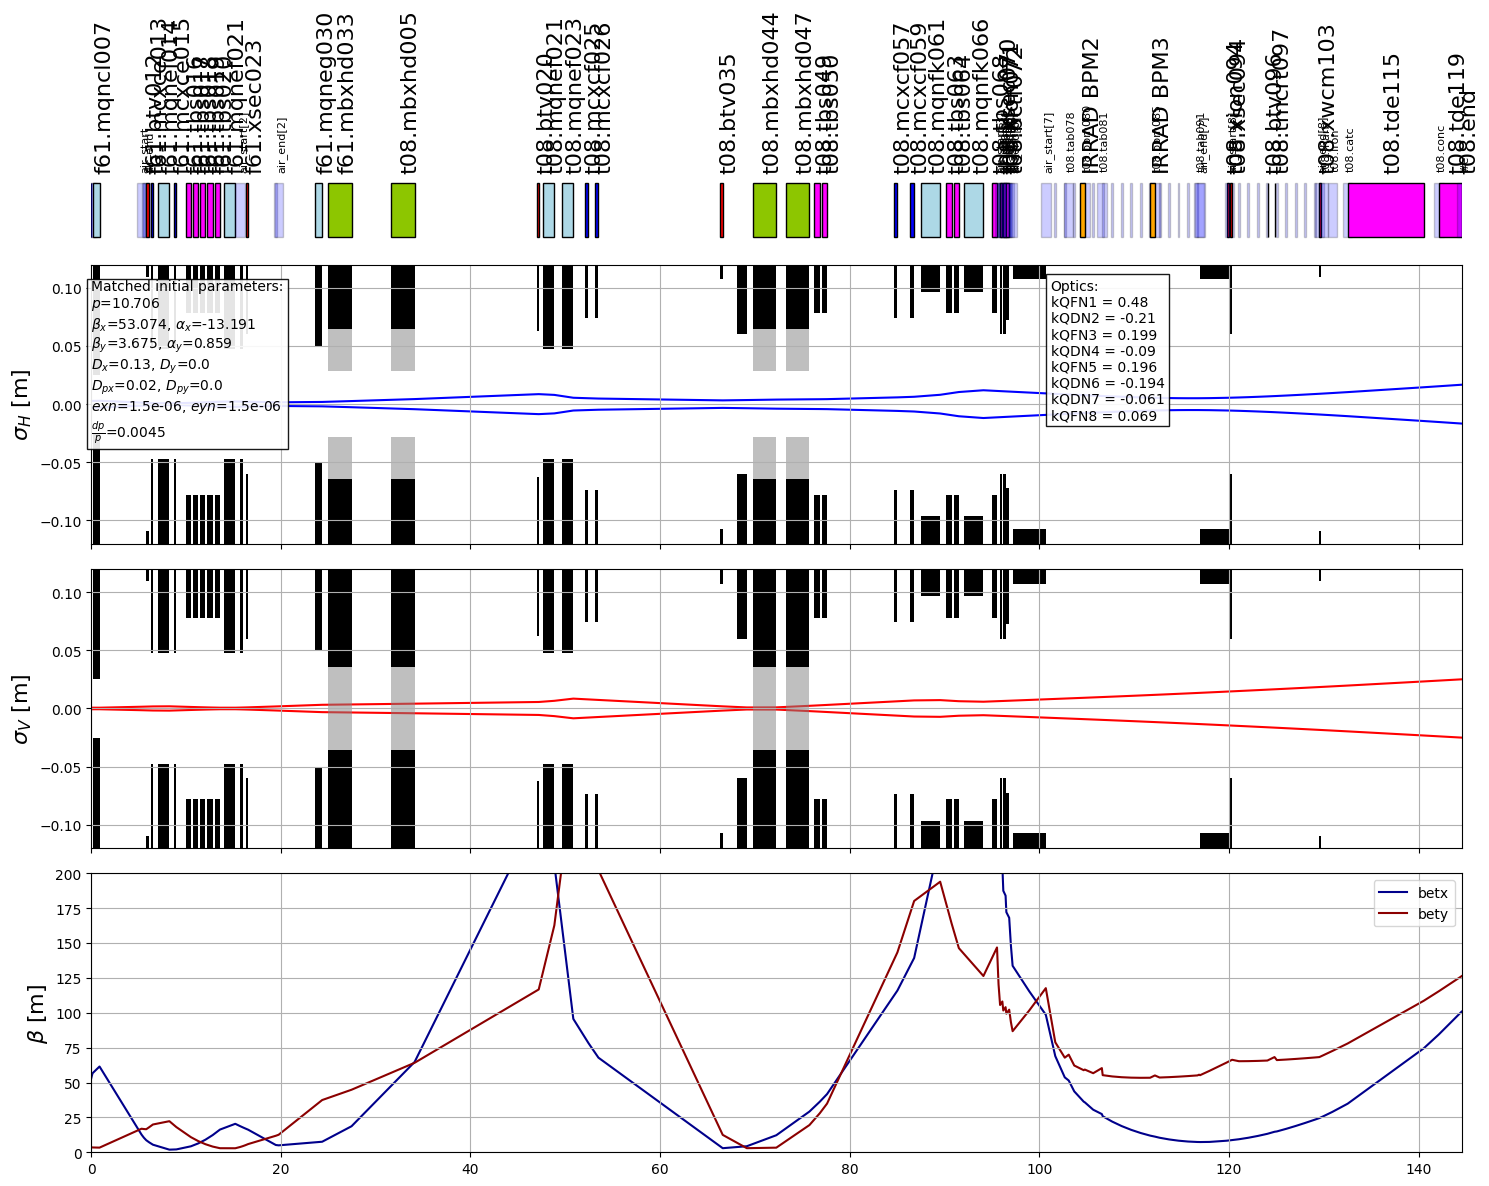

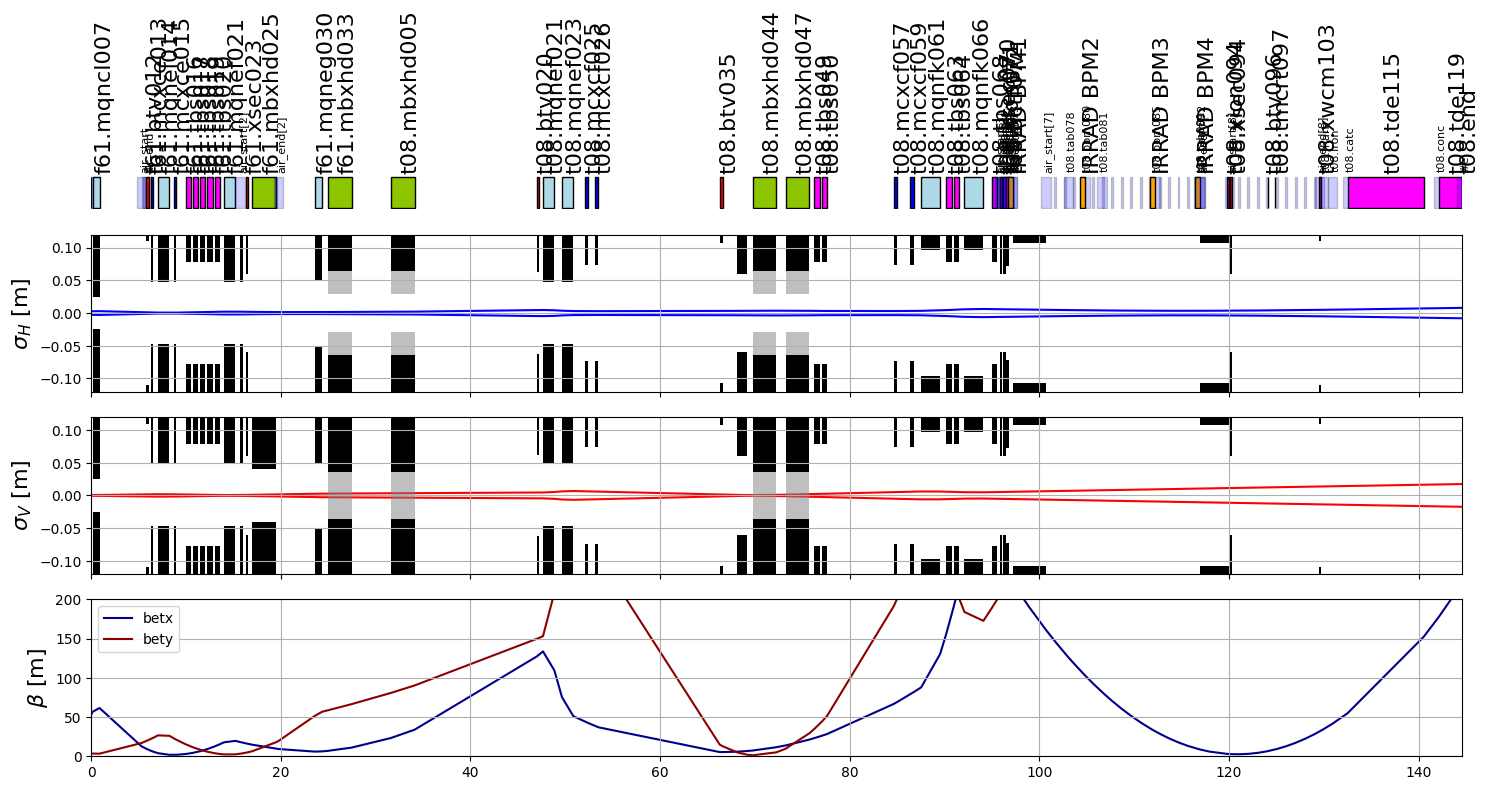

In [110]:
# Matched initial parameters 13nd oct 2023
betx0 = 53.074
alfx0 = -13.191
dx0 = 0.13
dpx0 = 0.02
exn0 = 2.53e-5

bety0 = 3.675
alfy0 = 0.859
dy0 = 0.0
dpy0 = 0.0
eyn0 = 6.94e-06

sige = 0.0045

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

# Optics
optics = op_optics
madx.input("kQFN1 = "+str(optics[0])+";")
madx.input("kQDN2 = "+str(-optics[1])+";")
madx.input("kQFN3 = "+str(optics[2])+";")
madx.input("kQDN4 = "+str(-optics[3])+";")
madx.input("kQFN5 = "+str(optics[4])+";")
madx.input("kQDN6 = "+str(-optics[5])+";")
madx.input("kQDN7 = "+str(-optics[6])+";")
madx.input("kQFN8 = "+str(optics[7])+";")

# Add the Air region
sequence = "f61t8_op"

p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

#t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


# add_hidden_marker(madx, sequence, 20, 100, steps)

madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
madx.use(sequence=sequence)

# make thin
madx.use(sequence="f61t8_op")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')
madx.use(sequence="f61t8_op")
madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
# madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")
madx.use(sequence="f61t8_op")


twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

# plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])


# Air scattering
madx.use(sequence=sequence)
madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p/charge, twiss, ex_initial, ey_initial)

fontsize=16
figsize=(15,12)
height_ratios=[1,3,3,3]
fig, ax = plt.subplots(4,1, figsize=figsize, tight_layout=True, sharex=True, height_ratios=height_ratios)
    
draw_synoptic(ax[0], twiss_scattered)

ax[1].plot(twiss_scattered['s'], beam_size(twiss_scattered['betx'], twiss_scattered['dx'], twiss_scattered['ex'], sige, 1)+twiss_scattered.x, alpha=1.0, color ="b", zorder=0)
ax[1].plot(twiss_scattered['s'], -beam_size(twiss_scattered['betx'], twiss_scattered['dx'], twiss_scattered['ex'], sige, 1)+twiss_scattered.x, alpha=1.0, color ="b", zorder=0)
ax[1].set_xlim(0,twiss_scattered.s[-1])

ax[2].plot(twiss_scattered['s'], beam_size(twiss_scattered['bety'], twiss_scattered['dy'], twiss_scattered['ey'], sige, 1)+twiss_scattered.y, alpha=1.0, color ="r", zorder=0)
ax[2].plot(twiss_scattered['s'], -beam_size(twiss_scattered['bety'], twiss_scattered['dy'], twiss_scattered['ey'], sige, 1)+twiss_scattered.y, alpha=1.0, color ="r", zorder=0)
ax[2].set_xlim(0,twiss_scattered.s[-1])

ax[1].grid()
ax[1].set_ylim(-0.12, 0.12)
ax[1].set_ylabel(r"$\sigma_{H}$ [m]", fontsize=fontsize)

ax[2].grid()
ax[2].set_ylim(-0.12, 0.12)
ax[2].set_ylabel(r"$\sigma_{V}$ [m]", fontsize=fontsize)

ax[3].plot(twiss_scattered.s, twiss_scattered.betx, alpha=1.0, color ="darkblue", zorder=0, label="betx")
ax[3].plot(twiss_scattered.s, twiss_scattered.bety, alpha=1.0, color ="darkred", zorder=0, label="bety")
ax[3].set_xlim(0,twiss_scattered.s[-1])

ax[3].legend()
ax[3].set_ylim(0, 200)
ax[3].grid()
ax[3].set_ylabel(r"$\beta$ [m]", fontsize=fontsize)

draw_aperture_circle(ax[1], twiss_scattered, "aper_1")
draw_aperture_circle(ax[2], twiss_scattered, "aper_1")
draw_aperture_rectangle(ax[1], twiss_scattered, "aper_1")
draw_aperture_rectangle(ax[2], twiss_scattered, "aper_2")
draw_aperture_racetrackH(ax[1], twiss_scattered, "aper_1", "aper_2", "aper_3", "aper_4")
draw_aperture_racetrackV(ax[2], twiss_scattered, "aper_1", "aper_2", "aper_3", "aper_4")


# Box with initial parameters
textstr = '\n'.join((
    "Matched initial parameters:",
    r'$p$='+str(round(p/charge,3)),
    r'$\beta_{x}$='+str(round(betx0,3))+r', $\alpha_{x}$='+str(round(alfx0,3)),
    r'$\beta_{y}$='+str(round(bety0,3))+r', $\alpha_{y}$='+str(round(alfy0,3)),
    r'$D_{x}$='+str(round(dx0,3))+r', $D_{y}$='+str(round(dy0,3)),
    r'$D_{px}$='+str(round(dpx0,3))+r', $D_{py}$='+str(round(dpy0,3)),
    r'$exn$='+str(round(exn,8))+r', $eyn$='+str(round(eyn,8)),
    r'$\frac{dp}{p}$='+str(round(sige,6)),
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
ax[1].text(0., 0.95, textstr, transform=ax[1].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


# Box with optics
textstr = '\n'.join((
    "Optics:",
    "kQFN1 = "+str(round(optics[0],3)),
    "kQDN2 = "+str(round(-optics[1],3)),
    "kQFN3 = "+str(round(optics[2],3)),
    "kQDN4 = "+str(round(-optics[3],3)),
    "kQFN5 = "+str(round(optics[4],3)),
    "kQDN6 = "+str(round(-optics[5],3)),
    "kQDN7 = "+str(round(-optics[6],3)),
    "kQFN8 = "+str(round(optics[7],3)),
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
ax[1].text(0.7, 0.95, textstr, transform=ax[1].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plot_graph(twiss, ex, sige, ey, figsize=(15,8))

# Find the parabola with air scattering

In [130]:
# Matched initial parameters 13nd oct 2023
betx0 = 53.074
alfx0 = -13.191
dx0 = 0.13
dpx0 = 0.02
exn0 = 2.53e-5

bety0 = 3.675
alfy0 = 0.859
dy0 = 0.0
dpy0 = 0.0
eyn0 = 6.94e-06

sige = 0.0045

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

sigH_list = []
sigV_list = []
k_list = np.linspace(0.02, 0.18, 50)
for k in k_list:
    print(f"k = {k}")
    with open('tempfile', 'w') as f:
        madx = Madx(stdout=f,stderr=f)
        madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

    madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
    madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

    # Optics
    optics = op_optics
    madx.input("kQFN1 = "+str(optics[0])+";")
    madx.input("kQDN2 = "+str(-optics[1])+";")
    madx.input("kQFN3 = "+str(optics[2])+";")
    madx.input("kQDN4 = "+str(-optics[3])+";")
    madx.input("kQFN5 = "+str(optics[4])+";")
    madx.input("kQDN6 = "+str(-optics[5])+";")
    madx.input("kQDN7 = "+str(-k)+";")
    madx.input("kQFN8 = "+str(optics[7])+";")

    # Add the Air region
    sequence = "f61t8_op"

    p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
    p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
    add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
    p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
    add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

    #t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
    p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
    add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
    add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
    add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
    add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

    pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
    len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
    pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
    add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

    pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
    len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
    pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
    add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


    # add_hidden_marker(madx, sequence, 20, 100, steps)

    madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
    madx.input('BRHO      := BEAM->PC * 3.3356;')
    madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
    madx.use(sequence=sequence)

    # make thin
    madx.use(sequence="f61t8_op")
    madx.input('SEQEDIT, sequence=f61t8_op;')
    madx.input('FLATTEN;')
    madx.input('ENDEDIT;')
    madx.use(sequence="f61t8_op")
    madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
    # madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")
    madx.use(sequence="f61t8_op")


    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

    # plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])

    # Air scattering
    madx.use(sequence=sequence)
    madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
    twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p/charge, twiss, ex_initial, ey_initial)

    instrument_focal_point = "t08.xwcm103"
    sigH = beam_size(twiss_scattered['betx'][instrument_focal_point], twiss_scattered['dx'][instrument_focal_point], twiss_scattered['ex'][instrument_focal_point], sige, 1)
    sigV = beam_size(twiss_scattered['bety'][instrument_focal_point], twiss_scattered['dy'][instrument_focal_point], twiss_scattered['ey'][instrument_focal_point], sige, 1)

    sigH_list.append(sigH)
    sigV_list.append(sigV)

k = 0.02
k = 0.02326530612244898
k = 0.026530612244897958
k = 0.02979591836734694
k = 0.03306122448979592
k = 0.0363265306122449
k = 0.03959183673469388
k = 0.04285714285714286
k = 0.046122448979591835
k = 0.04938775510204082
k = 0.0526530612244898
k = 0.05591836734693878
k = 0.05918367346938776
k = 0.062448979591836734
k = 0.06571428571428571
k = 0.0689795918367347
k = 0.07224489795918368
k = 0.07551020408163266
k = 0.07877551020408163
k = 0.08204081632653061
k = 0.0853061224489796
k = 0.08857142857142858
k = 0.09183673469387756
k = 0.09510204081632653
k = 0.09836734693877551
k = 0.1016326530612245
k = 0.10489795918367348
k = 0.10816326530612246
k = 0.11142857142857143
k = 0.11469387755102041
k = 0.1179591836734694
k = 0.12122448979591838
k = 0.12448979591836735
k = 0.12775510204081633
k = 0.1310204081632653
k = 0.13428571428571429
k = 0.13755102040816328
k = 0.14081632653061224
k = 0.14408163265306123
k = 0.1473469387755102
k = 0.15061224489795919
k = 0.15387755102040815
k = 0.157142

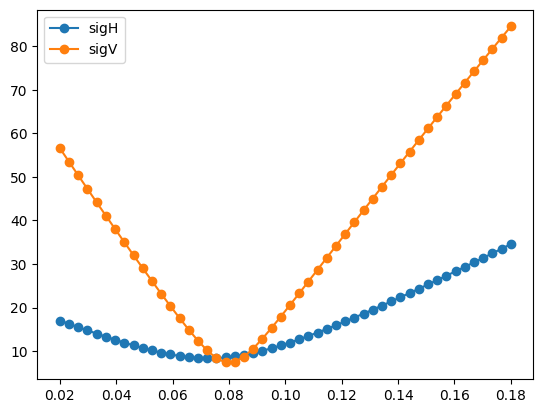

In [131]:
fig, ax = plt.subplots()
ax.plot(k_list, np.array(sigH_list)*1000, marker="o", label="sigH")
ax.plot(k_list, np.array(sigV_list)*1000, marker="o", label="sigV")
ax.legend()